# Chapter 5 Laboratory

## Foundations for statistical inference - Sampling distributions (1)

In this lab, you will investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a _sampling distribution_ of our estimate in order to learn about the properties of the estimate, such as its distribution.

__Setting a seed:__ We will take some random samples and build sampling distributions in this lab, which means we should set a seed at the start of the lab.

## Getting Started

### Load packages

In this lab, we will explore and visualize the data using the tidyverse suite of packages. We will also use the infer package for resampling.

Let’s load the packages.

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Setting the seed
np.random.seed(0)

# Setting seaborn theme
sns.set_theme()

## The data

A 2019 Gallup report states the following:

> The premise that scientific progress benefits people has been embodied in discoveries throughout the ages – from the development of vaccinations to the explosion of technology in the past few decades, resulting in billions of supercomputers now resting in the hands and pockets of people worldwide. Still, not everyone around the world feels science benefits them personally.

<cite>Source: [World Science Day: Is Knowledge Power?](https://news.gallup.com/opinion/gallup/268121/world-science-day-knowledge-power.aspx)</cite>

The Wellcome Global Monitor finds that 20% of people globally do not believe that the work scientists do benefits people like them. In this lab, you will assume this 20% is a true population proportion and learn about how sample proportions can vary from sample to sample by taking smaller samples from the population. We will first create our population assuming a population size of 100,000. This means 20,000 (20%) of the population think the work scientists do does not benefit them personally and the remaining 80,000 think it does.

In [26]:
global_monitor = pd.DataFrame({
    "scientist_work": np.array(["Benefits"] * 80000 + ["Doesn't benefit"] * 20000) 
})


The name of the data frame is `global_monitor` and the name of the variable that contains responses to the question _“Do you believe that the work scientists do benefit people like you?”_ is `scientist_work`.

We can quickly visualize the distribution of these responses using a bar plot.

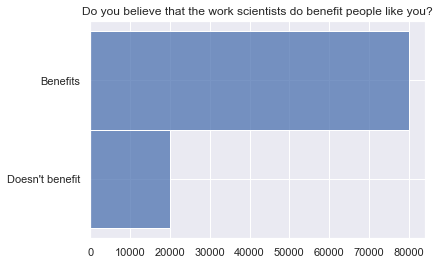

In [27]:
ax = sns.histplot(y="scientist_work", data=global_monitor)

plt.title("Do you believe that the work scientists do benefit people like you?")
plt.xlabel("")
plt.ylabel("")

plt.show()

We can also obtain summary statistics to confirm we constructed the data frame correctly.

In [28]:
stats = pd.concat([global_monitor.value_counts(), global_monitor.value_counts() / global_monitor.shape[0]], axis=1, ignore_index=True)
stats.columns = ["n", "p"]

stats

,n,p
scientist_work,,
Benefits,80000,0.8
Doesn't benefit,20000,0.2


## The unknown sampling distribution

In this lab, you have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.


In [29]:
sampl = global_monitor.sample(50)


This command collects a simple random sample of size 50 from the global_monitor dataset, and assigns the result to samp1. This is similar to randomly drawing names from a hat that contains the names of all in the population. Working with these 50 names is considerably simpler than working with all 100,000 people in the population.

### Exercise 1 - Describe the distribution of responses in this sample. How does it compare to the distribution of responses in the population. __Hint__: Although the `sample_n` function takes a random sample of observations (i.e. rows) from the dataset, you can still refer to the variables in the dataset with the same names. Code you presented earlier for visualizing and summarising the population data will still be useful for the sample, however be careful to not label your proportion `p`  since you’re now calculating a sample statistic, not a population parameters. You can customize the label of the statistics to indicate that it comes from the sample.

We can just use `value_counts()` to get some statistics about this new sample.

In [30]:
stats_hat = pd.concat([sampl.value_counts(), sampl.value_counts() / sampl.shape[0]], axis=1, ignore_index=True)
stats_hat.columns = ["n", "p"]

stats_hat

,n,p
scientist_work,,
Benefits,41,0.82
Doesn't benefit,9,0.18


Depending on which 50 people you selected, your estimate could be a bit above or a bit below the true population proportion of 0.26. In general, though, the sample proportion turns out to be a pretty good estimate of the true population proportion, and you were able to get it by sampling less than 1% of the population.

### Exercise 2 - Would you expect the sample proportion to match the sample proportion of another student’s sample? Why, or why not? If the answer is no, would you expect the proportions to be somewhat different or very different? Ask a student team to confirm your answer.

I would expect the sample proportions to vary slightly, not by a huge amount but to slightly vary around the population mean.

### Exercise 3 - Take a second sample, also of size 50, and call it `samp2`. How does the sample proportion of `samp2` compare with that of `samp1`? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population proportion?

Let's make `samp2`. 

In [31]:
samp2 = global_monitor.sample(50)

samp2.value_counts() / samp2.shape[0]

scientist_work 
Benefits           0.86
Doesn't benefit    0.14
dtype: float64

We see that proportions slightly change here. Let's now take two more samples, one of size 100 and another one of size 1000.

In [32]:
samp100 = global_monitor.sample(100)
samp1000 = global_monitor.sample(1000)

print(samp100.value_counts() / samp100.shape[0])
print(samp1000.value_counts() / samp1000.shape[0])

scientist_work 
Benefits           0.81
Doesn't benefit    0.19
dtype: float64
scientist_work 
Benefits           0.806
Doesn't benefit    0.194
dtype: float64


We still see variance but as the sample gets bigger, the sample proportions get closer to the true population proportions.

Not surprisingly, every time you take another random sample, you might get a different sample proportion. It’s useful to get a sense of just how much variability you should expect when estimating the population mean this way. The distribution of sample proportions, called the _sampling distribution (of the proportion)_, can help you understand this variability. In this lab, because you have access to the population, you can build up the sampling distribution for the sample proportion by repeating the above steps many times. Here, we use Python to take 15,000 different samples of size 50 from the population, calculate the proportion of responses in each sample, filter for only the _Doesn’t benefit_ responses, and store each result in a vector called `sample_props50`. Note that we specify that `replace = True` since sampling distributions are constructed by sampling with replacement.

In [33]:
sample_props50 = [global_monitor.sample(50) for _ in range(15000)]
sample_props50_df = pd.concat(sample_props50, axis=0, ignore_index=True)
sample_props50_df = pd.concat([sample_props50_df.value_counts(), sample_props50_df.value_counts() / sample_props50_df.shape[0]], axis=1, ignore_index=True)
sample_props50_df.columns = ["n", "p"]
sample_props50_df = sample_props50_df.loc["Doesn't benefit", :]


And we can visualize the distribution of these proportions with a histogram.

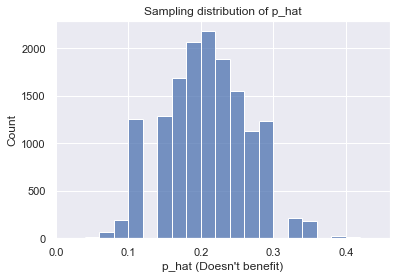

In [34]:
p_hats_db = np.array([df[df["scientist_work"] == "Doesn't benefit"].shape[0] / df.shape[0] for df in sample_props50])

sns.histplot(p_hats_db, binwidth=0.02)
plt.xlabel("p_hat (Doesn't benefit)")
plt.title("Sampling distribution of p_hat")

plt.show()